# 주가는
Retrospective Study

## Background
'주가는?' 영상이 조회수가 잘 나왔던 것 같다.  
그래서 실제로도 조회수가 잘 나왔는지 mean을 구하고 t-test를 해보았다.

In [111]:
api_key = [API_KEY]
channel_id = "UCH98-54LGg386084raqob6g"

In [112]:
from googleapiclient.discovery import build
youtube = build("youtube", "v3", developerKey=api_key)

In [113]:
def get_channel_videos(channel_id):
    res = youtube.channels().list(id=channel_id,
                                 part="contentDetails").execute()
    playlist_id = res["items"][0]["contentDetails"]["relatedPlaylists"]["uploads"]
    
    videos = []
    next_page_token = None
    
    while 1:
        res = youtube.playlistItems().list(playlistId=playlist_id,
                                          part="snippet",
                                          maxResults=50,
                                          pageToken=next_page_token).execute()
        videos += res["items"]
        next_page_token = res.get("nextPageToken")
        
        if next_page_token is None:
            break
    
    return videos

videos = get_channel_videos(channel_id)

In [114]:
video_ids = list(map(lambda x:x['snippet']['resourceId']['videoId'], videos))

def get_videos_stats(video_ids):
    stats = []
    for i in range(0, len(video_ids), 50):
        res = youtube.videos().list(id=','.join(video_ids[i:i+50]),
                                   part='statistics').execute()
        stats += res['items']
    return stats

stats = get_videos_stats(video_ids)

In [115]:
title = []
for video in videos:
    title.append(video['snippet']['title'])

In [116]:
viewCount = []
for stat in stats:
    viewCount.append(stat['statistics']['viewCount'])

In [117]:
import pandas as pd
df = pd.DataFrame(zip(title, viewCount), columns=['title','viewCount'])
df['viewCount'] = df['viewCount'].astype(int)

## Analysis

### Total

In [118]:
print('총 영상의 개수:', len(df))

총 영상의 개수: 3403


In [119]:
print('총 영상의 평균:', round(df['viewCount'].mean()))

총 영상의 평균: 3907


### Sample Size

In [120]:
treatment = df[df['title'].str.contains('주가는') == True]
placebo = df[df['title'].str.contains('주가는') == False]

In [121]:
print('실험군 sample size:', len(treatment))

실험군 sample size: 27


In [122]:
print('대조군 sample size:', len(placebo))

대조군 sample size: 3376


### Mean

In [123]:
print('실험군 조회수 평균:', round(treatment['viewCount'].mean()))

실험군 조회수 평균: 5957


In [124]:
print('대조군 조회수 평균:', round(placebo['viewCount'].mean()))

대조군 조회수 평균: 3890


### T-test

In [125]:
from scipy.stats import ttest_ind
ttest_ind(treatment['viewCount'], placebo['viewCount'])

Ttest_indResult(statistic=2.4331229124870073, pvalue=0.015020420022112988)

### Median

In [126]:
print('실험군 조회수 중앙값:', round(treatment['viewCount'].median()))

실험군 조회수 중앙값: 6743


In [127]:
print('대조군 조회수 중앙값:', round(placebo['viewCount'].median()))

대조군 조회수 중앙값: 2435


### Barchart

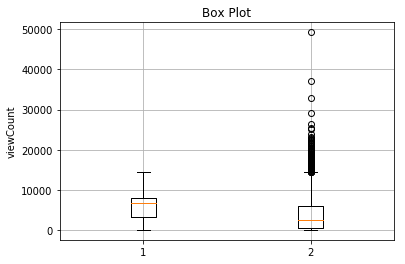

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.boxplot([treatment['viewCount'], placebo['viewCount']])
plt.xlabel('')
plt.ylabel('viewCount')
plt.title('Box Plot')
plt.grid()
plt.show()

## Results
실험군 조회수 평균은 5957회,  
대조군 조회수 평균은 3890회  
(p-value = 0.015)

## Conclusion
'주가는' 제목은 조회수가 잘 나온다.   
주가(X) 주가는(O)